In [1]:
# -*- coding: UTF-8 -*-
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas

In [2]:
def readX(path, lines):
	X = pandas.read_json(path, lines = lines)
	try:
		X = X.astype({"country":'float'}) 
	except:
		pass
	try:
		X = X.astype({"city":'float'}) 
	except:
		pass
	try:
		X = X.astype({"institution": 'float'}) 
	except:
		pass
	return X

In [3]:
Y = pandas.read_json("..\\jsons\\Data_Y.json", lines = True)
Y['connected'] = Y['connected'].astype(float)
X = readX("..\\jsons\\Data_X.json", True)
X.head()


,country,city,institution,hIndex,numCits,numDocs,numCoAuthors,jaccardCoef,areas
0,1.0,1.0,1.0,0.33333,0.04117,0.45714,0.63043,0.03704,0.68421
1,1.0,1.0,1.0,0.00000,0.00000,0.00952,0.02174,0.01869,0.05882
2,1.0,1.0,0.0,0.91667,0.44352,0.47945,0.57741,0.03371,0.71429
3,1.0,0.0,0.0,0.29167,0.04411,0.48571,0.57246,0.04516,0.63158
4,1.0,0.0,0.0,0.00000,0.00000,0.00952,0.05072,0.03738,0.23529


In [4]:
model1 = keras.Sequential([
	keras.Input(shape = (8)),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(8, activation='sigmoid'),
	keras.layers.Dense(4, activation='sigmoid'),
	keras.layers.Dense(1)
])

weights = model1.get_weights()

model1.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(from_logits=True),
	metrics = ['accuracy'])

model1.build()
#model1.summary()

In [5]:
collsX = X.columns
res1 = dict()

for i in range(len(collsX)):
	newX = readX("varRemoved\\X_" + collsX[i] + ".json", False)

	X_train, X_test, Y_train, Y_test = train_test_split(newX, Y, test_size=0.2, random_state=42)
	X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

	history = model1.fit(X_test.to_numpy(), Y_test.to_numpy(), epochs=100, batch_size=256, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()))
	model1.set_weights(weights)

	res1[collsX[i]] = history

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 0.7098 - accuracy: 0.5058 - val_loss: 0.6943 - val_accuracy: 0.4993
Epoch 2/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5044 - val_loss: 0.6930 - val_accuracy: 0.4993
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5044 - val_loss: 0.6923 - val_accuracy: 0.4993
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5044 - val_loss: 0.6759 - val_accuracy: 0.4993
Epoch 7/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.5105 - val_loss: 0.6179 - val_accuracy: 0.6466

In [6]:
model2 = keras.Sequential([
	keras.Input(shape = (7)),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(8, activation='sigmoid'),
	keras.layers.Dense(4, activation='sigmoid'),
	keras.layers.Dense(1)
])

weights = model2.get_weights()

model2.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(from_logits=True),
	metrics = ['accuracy'])

model2.build()
#model2.summary()

In [12]:
collsX = X.columns.tolist()
collsX.remove('jaccardCoef')
res2 = dict()

for i in range(len(collsX)):
	newX = readX("jaccRemoved\\X_" + collsX[i] + ".json", False)

	X_train, X_test, Y_train, Y_test = train_test_split(newX, Y, test_size=0.2, random_state=42)
	X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

	history = model2.fit(X_test.to_numpy(), Y_test.to_numpy(), epochs=100, batch_size=128, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()))
	model2.set_weights(weights)

	res2[collsX[i]] = history

Epoch 1/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 2/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6936 - val_accuracy: 0.4993
Epoch 3/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 4/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6933 - val_accuracy: 0.4993
Epoch 5/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 6/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 7/100
231/231 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6936 - val_accuracy: 0.4993

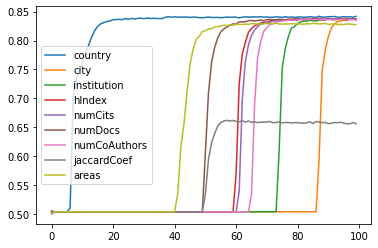

In [10]:
for k, v in res1.items():
	plt.plot(v.history["accuracy"], label = k)
#plt.ylim(ymax = 1, ymin = 0.45)
plt.legend()
plt.show()

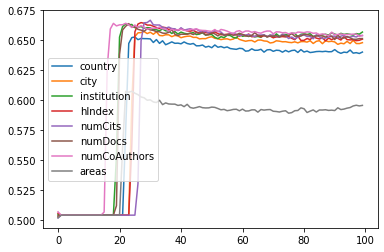

In [16]:
for k, v in res2.items():
	plt.plot(v.history["accuracy"], label = k)
#plt.ylim(ymax = 1, ymin = 0.45)
plt.legend()
plt.show()

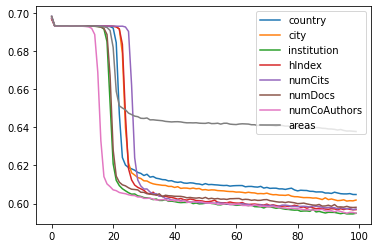

In [14]:
for k, v in res2.items():
	plt.plot(v.history["loss"], label = k)
#plt.ylim(ymax = 1, ymin = 0.45)
plt.legend()
plt.show()